## Visualization of well trajectory

Visualization of well trajectory is the process of displaying the path of a wellbore in a 2D or 3D space. This can be done using a variety of software programs, and it is an important tool for engineers and geologists who are planning and managing oil and gas wells.

There are two main types of well trajectory visualization:

2D visualization shows the wellbore path as a line on a map. This is the simplest type of visualization, but it can be useful for understanding the general direction of the well.
3D visualization shows the wellbore path as a curve in a 3D space. This is a more complex type of visualization, but it can be more accurate and can provide more information about the wellbore's shape and orientation.

The specific features that are displayed in a well trajectory visualization can vary depending on the software program and the purpose of the visualization. However, some common features include:

The wellbore path
The true vertical depth (TVD) of the wellbore
The dogleg severity of the wellbore
The inclination of the wellbore
The azimuth of the wellbore
The location of the wellbore's target

In this part the **libraries** are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.patches as mpatches                                               
import matplotlib.colors as colors

from matplotlib_inline.backend_inline import set_matplotlib_formats 
set_matplotlib_formats('svg')

1) Define a function to plot lithology data:

In [6]:
def txt_to_csv(input_file_path, output_file_path, delimiter='\t'):
    # Read the input text file
    with open(input_file_path, 'r') as input_file:
        lines = input_file.readlines()

    # Create the CSV data
    csv_data = []
    for line in lines:
        values = line.strip().split()
        csv_data.append(",".join(values))

    # Write the CSV file
    with open(output_file_path, 'w') as output_file:
        output_file.write("\n".join(csv_data))

# Specify input and output file paths
input_file_path = '/Users/amirhosseinakhondzadeh/@ DATA/Petrobras/1-brsa-871-mg_direcionais.txt'
output_file_path = '/Users/amirhosseinakhondzadeh/@ DATA/Petrobras/1-brsa-871-mg_direcionais.csv'

# Convert and create the CSV file
txt_to_csv(input_file_path, output_file_path)

print("Conversion to CSV complete.")


Conversion to CSV complete.


In [7]:
survey = pd.read_csv('/Users/amirhosseinakhondzadeh/@ DATA/Petrobras/1-brsa-871-mg_direcionais.csv')

ParserError: Error tokenizing data. C error: Expected 6 fields in line 7, saw 8


In [2]:
def plot_lithology(ax, depth_intervals, lithology_colors, lithology_hatches, well_name, ylabel):
    ax.set_xlim(0, 1)
    ax.set_ylim(depth_intervals[-1][1], depth_intervals[0][0])
    ax.set_xlabel('', color='black', fontsize=10)
    ax.set_ylabel(ylabel, color='black', fontsize=10)
    ax.set_title(well_name, color='black', fontsize=10, fontweight='bold')
    ax.set_xticks([])

    for depth, color, hatch in zip(depth_intervals, lithology_colors, lithology_hatches):
        ax.fill_betweenx([depth[0], depth[1]], 0, 1, color=color, hatch=hatch, edgecolor='black', lw=0.5)

This function takes several parameters:

- **ax**: The subplot object where the lithological column will be plotted.

- **depth intervals**: A list of tuples representing the depth intervals for different lithologies in the well.

- **lithology colors**: A list of color names corresponding to each depth interval in depth_intervals.

- **lithology hatches**: A list of hatch styles corresponding to each depth interval in depth_intervals.

- **well name**: A string representing the name of the well being plotted.

- **ylabel**: A string representing the label for the y-axis, indicating the depth covered by the lithological column.



2) Define the lithology data for each well:

In [3]:
# Define the lithology data for each well
depth_intervals1 = [(3241, 3300), (3300, 3350), (3350, 3360), (3360, 3365), (3365, 3370), (3370, 3372), (3372, 3375),
                    (3375, 3380), (3380, 3385), (3385, 3400), (3400, 3403), (3403, 3415)]
lithology_colors1 = ['dodgerblue', 'yellow', 'yellow', 'dodgerblue', 'yellow', 'dodgerblue', 'yellow', 'lime', 'crimson',
                     'lime', 'crimson', 'lime']
lithology_hatches1 = ['-/', '-.', '-.', '-/', '-.', '-/', '-.', '--', '-...', '--', '-...', '--']

depth_intervals2 = [(3250, 3290), (3290, 3300), (3300, 3310), (3310, 3320), (3320, 3330), (3330, 3600)]
lithology_colors2 = ['lime', 'crimson', 'lime', 'yellow', 'red', 'yellow']
lithology_hatches2 = ['--', '-...', '--', '-.', '+++', '-.']

depth_intervals3 = [(4975, 5340), (5340, 5360), (5360, 5790), (5790, 5800)]
lithology_colors3 = ['cornflowerblue', 'magenta', 'paleturquoise', 'lime']
lithology_hatches3 = ['x', '/', '+', '--']

depth_intervals4 = [(5342, 5400), (5400, 5415), (5415, 5635), (5635, 5650), (5650, 5684)]
lithology_colors4 = ['cornflowerblue', 'magenta', 'paleturquoise', 'lime', 'paleturquoise']
lithology_hatches4 = ['x', '/', '+', '--', '+']

These variables define the depth intervals, lithology colors, and lithology hatches for each well. Each depth interval is represented by a tuple containing the start and end depths. The corresponding lithology colors and hatches are specified in separate lists.

3) Plot the lithology data for each well using the defined function:

- Create the lithological column plot
- Here, we create a 1x4 grid of subplots with a shared y-axis (lithological column). fig is the figure object, and axes is an array of subplot objects. The figsize parameter sets the size of the figure (width, height) in inches. subplots_adjust is used to adjust the spacing between the subplots.

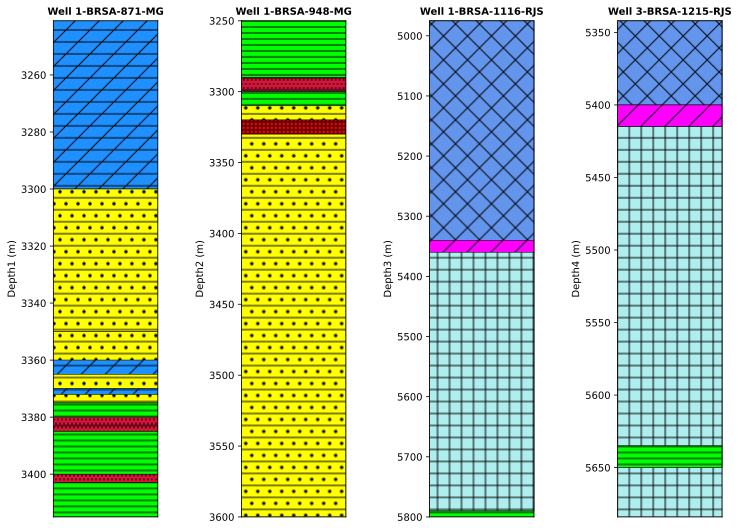

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 10))
fig.subplots_adjust(top=0.8, wspace=0.15)

plot_lithology(axes[0], depth_intervals1, lithology_colors1, lithology_hatches1, 'Well 1-BRSA-871-MG', 'Depth1 (m)')
plot_lithology(axes[1], depth_intervals2, lithology_colors2, lithology_hatches2, 'Well 1-BRSA-948-MG', 'Depth2 (m)')
plot_lithology(axes[2], depth_intervals3, lithology_colors3, lithology_hatches3, 'Well 1-BRSA-1116-RJS', 'Depth3 (m)')
plot_lithology(axes[3], depth_intervals4, lithology_colors4, lithology_hatches4, 'Well 3-BRSA-1215-RJS', 'Depth4 (m)')

fig.subplots_adjust(wspace=0.8)
plt.show()

These lines call the plot_lithology function for each subplot (well) with the respective lithology data and well name. The function plots the lithological column in each subplot according to the specified depth intervals, colors, and hatches.

## Create Lithology Legend

Start with *lables*, *colors*, and *hatches*:

In [5]:
lithology_labels  = ['Dolomite','Igneous','Limestone','Sandstone','Shale','Silt']
lithology_colors  = ['dodgerblue','red','paleturquoise','yellow','lime','crimson']
lithology_hatches = ['-/','+++','+','-.','--','-...']

legend_patches = []
for color, hatch, label in zip(lithology_colors, lithology_hatches, lithology_labels):
    patch = mpatches.Patch(facecolor=color, hatch=hatch, edgecolor='black', label=label)
    legend_patches.append(patch)

In these lines, three lists are defined:

- **lithology_labels**: A list containing the names or labels of different lithologies (rock types), such as 'Dolomite', 'Igneous', 'Limestone', etc.

- **lithology_colors**: A list of colors corresponding to each lithology. The colors are specified using named colors from the matplotlib color library, such as 'dodgerblue', 'red', 'paleturquoise', etc.

- **lithology_hatches**: A list of hatch patterns corresponding to each lithology. Hatch patterns are used to fill the lithological columns with different patterns to visually distinguish between the lithologies. The hatch patterns are specified using special characters like '-', '+', '/'. The characters are combined to create various hatch patterns like '-/', '+++', '-.', etc.

**legend_patches = [ ]**, This line creates an empty list called legend_patches. This list will be used to store the legend patches, which represent the lithologies with their respective colors and hatch patterns.

In this **for loop**, we iterate over the lithology_colors, lithology_hatches, and lithology_labels lists simultaneously using the zip function. The zip function combines the elements from each list into tuples for each iteration.

Inside the loop, we create a mpatches.Patch object called patch. This object represents a graphical shape with specified properties.

The properties of the patch are defined as follows:

- **facecolor**: The fill color of the patch, which is taken from the lithology_colors list.
- **hatch**: The hatch pattern used to fill the patch, taken from the lithology_hatches list.
- **edgecolor**: The color of the patch's edge, which is set to black in this case.
- **label**: The label associated with the patch, representing the lithology name, taken from the lithology_labels list.

Each patch is then appended to the legend_patches list, creating a list of patches that will be used to create the legend.

*The purpose of this loop is to generate legend patches for each lithology, with the respective colors, hatch patterns, and labels. The legend patches will be used later to create a legend explaining the different lithologies in the lithological column plot.*

(0.0, 1.0, 0.0, 1.0)

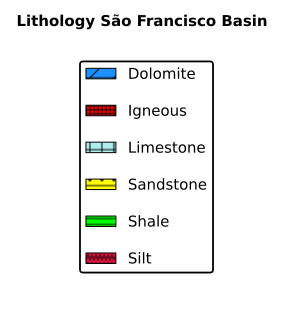

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("Lithology São Francisco Basin", fontsize=15, fontweight='bold')
fig.subplots_adjust(top=1)

legend = plt.legend(handles=legend_patches, fontsize=15, framealpha=1, loc='center', labelspacing=1.5)
legend.get_frame().set_linewidth(1.8)
legend.get_frame().set_edgecolor('black')
plt.axis('off')

(0.0, 1.0, 0.0, 1.0)

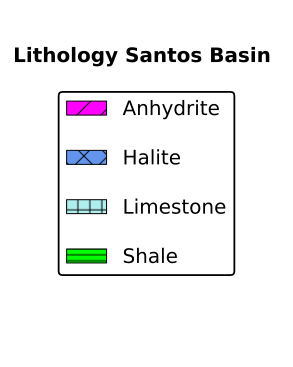

In [7]:
# Create Lithology Legend for Santos Basin 

fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("Lithology Santos Basin", fontsize=20, fontweight='bold')
fig.subplots_adjust(top=1.09)

# Define the lithology data
lithology_labels  = ['Anhydrite','Halite','Limestone','Shale']
lithology_colors  = ['magenta','cornflowerblue','paleturquoise','lime']
lithology_hatches = ['/','x','+','--']

# Create the legend patches
legend_patches = []
for color, hatch, label in zip(lithology_colors, lithology_hatches, lithology_labels):
    patch = mpatches.Patch(facecolor=color, hatch=hatch, edgecolor='black', label=label)
    legend_patches.append(patch)

# Create the legend
legend = plt.legend(handles=legend_patches, fontsize=20, framealpha=1, loc='center', labelspacing=1.5)
legend.get_frame().set_linewidth(1.8)
legend.get_frame().set_edgecolor('black')
plt.axis('off')